# Chapter 4 - Classification

- [Lab 4.6.1 The Stock Market Data](#lab-4.6.1)
- [Lab 4.6.2 Logistic Regression](#lab-4.6.2)
- [Lab 4.6.3 Linear Discriminant Analysis](#lab-4.6.3)
- [Lab 4.6.4 Quadratic Discriminant Analysis](#lab-4.6.4)
- [Lab 4.6.5 K-Nearest Neighbors](#lab-4.6.5)
- [Lab 4.6.6 An Application to Caravan Insurance Data](#lab-4.6.6)

### Imports and Configurations

In [1]:
# Standard imports
import warnings

# Use rpy2 for loading R datasets
from rpy2.robjects.packages import importr
from rpy2.robjects.packages import data as rdata
from rpy2.robjects import pandas2ri

# Math and data processing
import numpy as np
import scipy as sp
import pandas as pd

# StatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

# Visulization
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
import statsmodels.graphics.api as smg

<a id='lab-4.6.1'></a>

### Lab 4.6.1 The Stock Market Data

In [2]:
# Import Smarket dataset from R package ISLR
islr = importr('ISLR')
smarket_rdf = rdata(islr).fetch('Smarket')['Smarket']
smarket = pandas2ri.ri2py(smarket_rdf)

In [3]:
# Display dataset structures and statistics
display(smarket.head())
display(smarket.info())
display(smarket.describe())

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001.0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001.0,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001.0,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001.0,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001.0,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(8), object(1)
memory usage: 97.7+ KB


None

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [4]:
# Correlation matrix
display(smarket.corr())

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


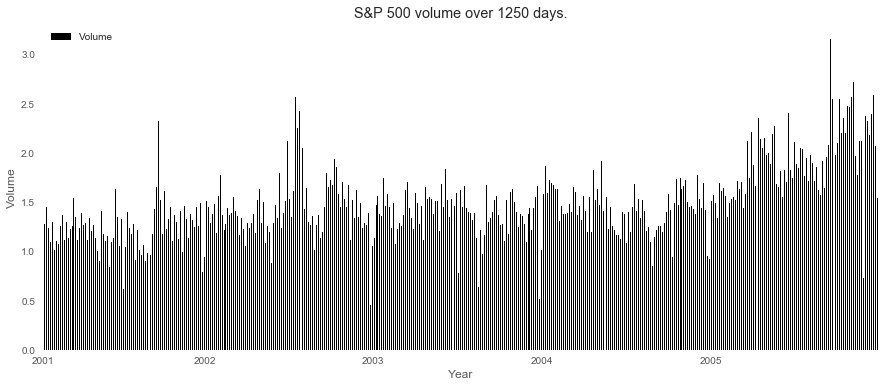

In [5]:
# Plot Smarket volumes
ax = smarket.plot('Year', 'Volume', kind='bar', figsize=(15,6), color='k')

# Remove redundant xtick labels
xticklabels = ['',] * smarket.shape[0]
xtext, xlocs = np.unique(smarket.Year, return_index=True)
for t, i in zip(xtext, xlocs):
    xticklabels[i] = str(int(t))
ax.set_xticklabels(xticklabels, rotation=0)
 
ax.set_ylabel('Volume')
ax.set_title('S&P 500 volume over 1250 days.')
plt.show()

<a id='lab-4.6.1'></a>

### Lab 4.6.2 Logistic Regression

##### StatsModels

In [6]:
# Logistic regression by GLM
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
smarket_glm = smf.glm(formula, data=smarket, family=sm.families.Binomial()).fit()
print('Deviance Residuals:')
display(smarket_glm.resid_deviance.describe())
print(smarket_glm.summary())
print('\n    Null deviance: {0:.1f} on {1} degrees of freedom'.format(smarket_glm.null_deviance, smarket_glm.df_model+smarket_glm.df_resid))
print('Residual deviance: {0:.1f} on {1} degrees of freedom'.format(smarket_glm.deviance, smarket_glm.df_resid))
print('AIC: {0:.2f}'.format(smarket_glm.aic))

Deviance Residuals:


count    1250.000000
mean       -0.012030
std         1.176023
min        -1.325832
25%        -1.145081
50%        -1.065292
75%         1.203130
max         1.446343
dtype: float64

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Tue, 28 Feb 2017   Deviance:                       1727.6
Time:                                          16:49:35   Pearson chi2:                 1.25e+03
No. Iterations:                                       6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------

##### scikit-learn LogisticRegression

In [7]:
# Specify features and response
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'

# Fit on the whole dataset
X = smarket[features]
y = smarket[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Extract coefficients from fitting results
coef = pd.DataFrame(logreg.coef_, columns=features)
coef.insert(loc=0, column='(Intercept)', value=logreg.intercept_)
coef.index=['']
display(coef)

,(Intercept),Lag1,Lag2,Lag3,Lag4,Lag5,Volume
,-0.125941,-0.073073,-0.0423,0.011084,0.009359,0.010312,0.135402


In [8]:
# In-sample prediction with type='response', or P(Y=1|X)
print("First ten in-sample prediction probabilities P(Y=1|X): ")
display(logreg.predict_proba(X)[0:10, 1])

# In-sample prediction with decisions
y_pred = logreg.predict(X)
print("In-sample prediction decision results: ")
display(y_pred[0:10])

First ten in-sample prediction probabilities P(Y=1|X): 


array([ 0.50708676,  0.48147055,  0.48114106,  0.51522477,  0.51078395,
        0.50695844,  0.49265161,  0.50923079,  0.51761641,  0.48884115])

In-sample prediction decision results: 


array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down'], dtype=object)

In [9]:
# Evaluate accruacy by confusion matrix and score
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', logreg.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down     145  457
     Up       141  507


Score:  0.5216


In [10]:
# Manual train-test split
smarket_train = smarket[smarket.Year!=2005]
smarket_test = smarket[smarket.Year==2005]
print("Training dataset shape: ", smarket_train.shape)
print("Test dataset shape: ", smarket_test.shape)

Training dataset shape:  (998, 9)
Test dataset shape:  (252, 9)


In [11]:
# Specify features and response
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'

# Fit on training data subset
X = smarket_train[features]
y = smarket_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = logreg.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', logreg.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      77  34
     Up        97  44


Score:  0.480158730159


In [12]:
# Specify features and response
features = ['Lag1', 'Lag2']
response = 'Direction'

# Improve prediction by removing features with large p-values
X = smarket_train[features]
y = smarket_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = logreg.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', logreg.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down      35   76
     Up        35  106


Score:  0.559523809524


<a id='lab-4.6.3'></a>

### Lab 4.6.3 Linear Discriminant Analysis

In [13]:
# Specify features and response
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training subset
X = smarket_train[features]
y = smarket_train[response]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(lda.priors_, index=lda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)
coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features)
print("\nCoefficients of linear discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of linear discriminants:


,LD1
Lag1,-0.642019
Lag2,-0.513529


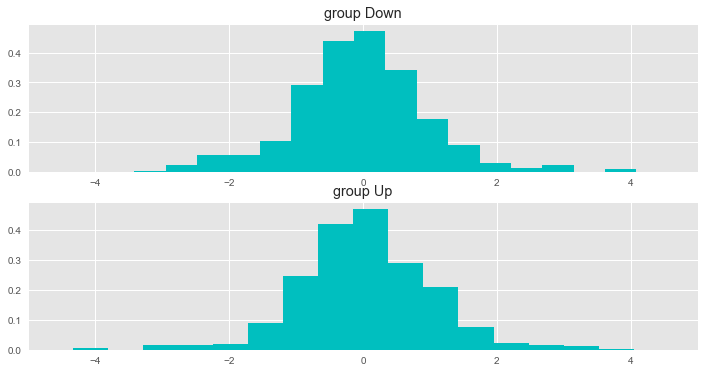

In [14]:
# Plot linear discriminants of the LDA training fit
smarket_grouped = smarket_train.groupby('Direction')
smarket_down = smarket_grouped.get_group('Down')
smarket_up = smarket_grouped.get_group('Up')
discrim_down = lda.transform(smarket_down[['Lag1', 'Lag2']])
discrim_up = lda.transform(smarket_up[['Lag1', 'Lag2']])
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.hist(discrim_down, 16, normed=True, color='c')
plt.title('group Down')
plt.xlim(-5, 5)
plt.subplot(2, 1, 2)
plt.hist(discrim_up, 16, normed=True, color='c')
plt.title('group Up')
plt.xlim(-5, 5)
plt.show()

In [15]:
# Prediction on test subset
X = smarket_test[['Lag1', 'Lag2']]
y = smarket_test['Direction']
y_pred = lda.predict(X)
# Generate posterior probability matrix
posterior = pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)
# Generate linear discriminants on the test subset
discrim_test = lda.transform(X)

In [16]:
# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], lda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], lda.classes_])
cfmat = confusion_matrix(y, y_pred, labels=lda.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', lda.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down      35   76
     Up        35  106


Score:  0.559523809524


In [17]:
# First 20 posterior probabilities
print('Posterior probabilities:')
print(posterior.iloc[:20])
# First 20 prediction results
print('\nFirst 20 prediction results: \n', y_pred[:20])
# Number of Down class with threshold changed to 0.9
print('\nNumber of Down class with threshold = 0.9: ', sum(posterior['Down'] > 0.9))

Posterior probabilities:
        Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367

First 20 prediction results: 
 ['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']

Number of Down class with threshold = 0.9:  0


<a id='lab-4.6.3'></a>

### Lab 4.6.4 Quadratic Discriminant Analysis

In [18]:
# Specify features and response
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training subset
X = smarket_train[features]
y = smarket_train[response]
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)
coef = pd.DataFrame(qda.scalings_, columns=['QD1', 'QD2'], index=features)
print("\nCoefficients of quadratic discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of quadratic discriminants:


,QD1,QD2
Lag1,1.562945,1.479273
Lag2,1.534551,1.472723


In [19]:
# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = qda.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], qda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], qda.classes_])
cfmat = confusion_matrix(y, y_pred, labels=qda.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', qda.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down      30   81
     Up        20  121


Score:  0.599206349206


<a id='lab-4.6.5'></a>

### Lab 4.6.5 K-Nearest Neighbors

In [20]:
# Fit on training subset with K=1
features = ['Lag1', 'Lag2']
response = 'Direction'
K = 1
X = smarket_train[features]
y = smarket_train[response]
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = knn.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels=knn.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      43  68
     Up        58  83


Score:  0.5


In [21]:
# Fit on training subset with K=3
features = ['Lag1', 'Lag2']
response = 'Direction'
K = 3
X = smarket_train[features]
y = smarket_train[response]
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = knn.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels=knn.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      48  63
     Up        55  86


Score:  0.531746031746


<a id='lab-4.6.6'></a>

### Lab 4.6.6 An Application to Caravan Insurance Data

In [22]:
# Import Caravan data from R package ISLR
islr = importr('ISLR')
caravan_rdf = rdata(islr).fetch('Caravan')['Caravan']
caravan = pandas2ri.ri2py(caravan_rdf)

In [23]:
display(caravan.head(10))
display(caravan['Purchase'].value_counts())

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33.0,1.0,3.0,2.0,8.0,0.0,5.0,1.0,3.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No
2,37.0,1.0,2.0,2.0,8.0,1.0,4.0,1.0,4.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No
3,37.0,1.0,2.0,2.0,8.0,0.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No
4,9.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No
5,40.0,1.0,4.0,2.0,10.0,1.0,4.0,1.0,4.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No
6,23.0,1.0,2.0,1.0,5.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
7,39.0,2.0,3.0,2.0,9.0,2.0,2.0,0.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
8,33.0,1.0,2.0,3.0,8.0,0.0,7.0,0.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
9,33.0,1.0,2.0,4.0,8.0,0.0,1.0,3.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
10,11.0,2.0,3.0,3.0,3.0,3.0,5.0,0.0,2.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No


No     5474
Yes     348
Name: Purchase, dtype: int64

In [24]:
# Scaling, train-test split, and building design matrcies
features = caravan.columns.drop('Purchase')
response = 'Purchase'
X_scaled = scale(caravan[features])
X_train = X_scaled[1000:]
y_train = caravan[response][1000:]
X_test = X_scaled[:1000]
y_test = caravan[response][:1000]
print("Training features shape: ", X_train.shape)
print("Test features shape: ", X_test.shape)

Training features shape:  (4822, 85)
Test features shape:  (1000, 85)


In [25]:
# KNN fit on training set with K=1,3,5 and predict on test set
for K in (1, 3, 5):
    print("\n======================\nK = {}:".format(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate accuracy
    cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
    cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
    cfmat = confusion_matrix(y_test, y_pred, labels=knn.classes_)
    print("\nConfusion Matrix: ")
    display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
    print('\nScore: ', knn.score(X_test, y_test))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred, digits=3))


K = 1:

Confusion Matrix: 


Predict    
              No Yes
True No      873  68
     Yes      50   9


Score:  0.882

Classification Report:
             precision    recall  f1-score   support

         No      0.946     0.928     0.937       941
        Yes      0.117     0.153     0.132        59

avg / total      0.897     0.882     0.889      1000


K = 3:

Confusion Matrix: 


Predict    
              No Yes
True No      921  20
     Yes      54   5


Score:  0.926

Classification Report:
             precision    recall  f1-score   support

         No      0.945     0.979     0.961       941
        Yes      0.200     0.085     0.119        59

avg / total      0.901     0.926     0.912      1000


K = 5:

Confusion Matrix: 


Predict    
              No Yes
True No      930  11
     Yes      55   4


Score:  0.934

Classification Report:
             precision    recall  f1-score   support

         No      0.944     0.988     0.966       941
        Yes      0.267     0.068     0.108        59

avg / total      0.904     0.934     0.915      1000



In [26]:
# Logistic regression on training set and predict on test set
logreg = LogisticRegression(C=1e9)  # Large C to disable regularization
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))


Confusion Matrix: 


Predict    
              No Yes
True No      934   7
     Yes      59   0


Classification Report:
             precision    recall  f1-score   support

         No      0.941     0.993     0.966       941
        Yes      0.000     0.000     0.000        59

avg / total      0.885     0.934     0.909      1000



In [27]:
# Generate predicts with decision threshold = 0.25
posterior = logreg.predict_proba(X_test)
Yes_idx = np.where(logreg.classes_ == 'Yes')[0][0]
y_pred = pd.Series(posterior[:, Yes_idx] > 0.25)
y_pred.replace([True, False], ['Yes', 'No'], inplace=True)

# Evaluate accuracy
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))



Confusion Matrix: 


Predict    
              No Yes
True No      919  22
     Yes      48  11


Classification Report:
             precision    recall  f1-score   support

         No      0.950     0.977     0.963       941
        Yes      0.333     0.186     0.239        59

avg / total      0.914     0.930     0.921      1000

